In [18]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import signal

from pathlib import Path
from openpyxl import load_workbook

from soundcard import *

In [19]:
# Path settings
figureTargetFolder = Path(r"temp_figures")
dataTargetFolder = Path(r"./../data")

savefigures = True

if not figureTargetFolder.exists() and savefigures:
    figureTargetFolder.mkdir()

# Global Viz settings
sns.set_style("darkgrid")  # darkgrid, white grid, dark, white and ticks
plt.rc("axes", titlesize=18)  # fontsize of the axes title
plt.rc("axes", labelsize=18)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=16)  # fontsize of the tick labels
plt.rc("ytick", labelsize=16)  # fontsize of the tick labels
plt.rc("legend", fontsize=16)  # legend fontsize
plt.rc("font", size=16)  # controls default text sizes

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.family"] = "Arial"

myColorPal = sns.color_palette("deep")
myColorPal_pastel = sns.color_palette("pastel")

default_fig_size = (6, 4)
max_freq = 80  # kHz
min_freq = 0.2
gain_db_scale = (-5, 0.5)  # dBs
fft_db_scale = (-160, 10)  # dBs
fft_noiseAw_db_scale = (-200, -100)  # dBs

# Fig R1

C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\1549105088.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\1549105088.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\1549105088.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\1549105088.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


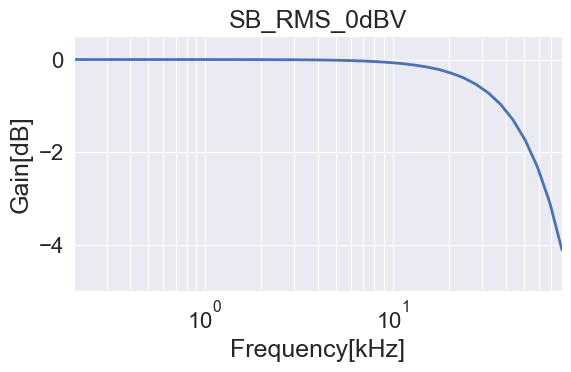

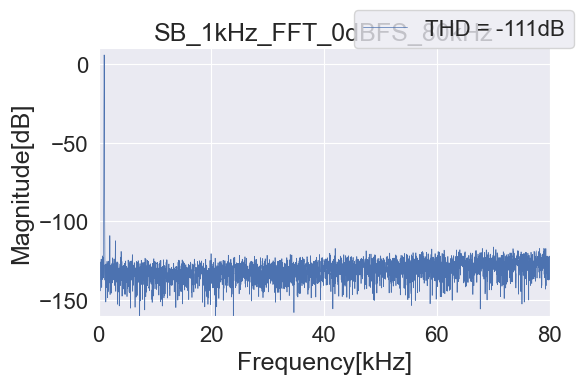

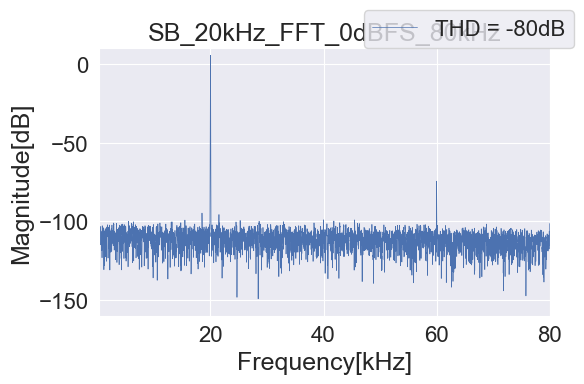

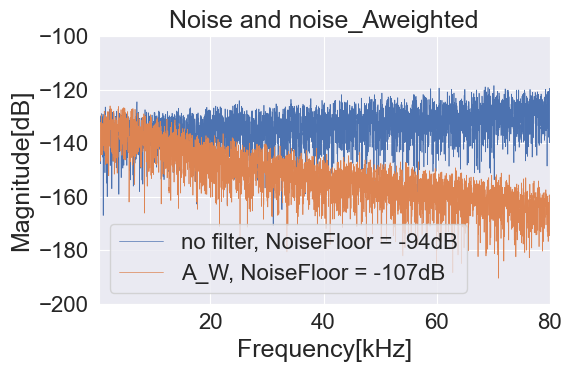

In [20]:
xlsxPath = dataTargetFolder / "Fig R1.xlsx"

sheetName = "SB_RMS_0dBV"
d = load_xlsx_sheet(xlsxPath, sheetName, col2=12)

## RMS
d["Y"] = d["Y"] - np.max(d["Y"])
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="Gain[dB]",
    xlim=None,
    linewidth=2,
)

ax.set_xscale("log", base=10)

ll = []
for iexp in (-1, 0, 1, 2, 3, 4):
    ll.append(np.arange(0, 10, 1) * 10 ** (iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim((min_freq, max_freq))
ax.set_ylim(gain_db_scale)
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + sheetName, figureTargetFolder))
fig.show()

## 1kHz sine wave
sheetName = "SB_1kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="Magnitude[dB]",
    xlim=(0, 80),
    label="THD = -111dB",
)
fig.legend()
ax.set_ylim(fft_db_scale)
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + sheetName, figureTargetFolder))
fig.show()

## 20kHz sine wave
sheetName = "SB_20kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="Magnitude[dB]",
    xlim=(min_freq, max_freq),
    label="THD = -80dB",
)
fig.legend()
ax.set_ylim(fft_db_scale)
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + sheetName, figureTargetFolder))
fig.show()

## Noise and Noise-Aweighted
d_noise = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_80kHz")
d_noise_a_w = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_Aweight_80kHz")
fig = plt.figure(figsize=default_fig_size, tight_layout=True)
ax = fig.add_subplot(1, 1, 1)
plt.plot(d_noise["X"] / 1000, d_noise["Y"], linewidth=0.5, c=myColorPal[0], label="no filter, NoiseFloor = -94dB")

plt.plot(d_noise_a_w["X"] / 1000, d_noise_a_w["Y"], linewidth=0.5, c=myColorPal[1], label="A_W, NoiseFloor = -107dB")

plt.title("Noise and noise_Aweighted")
plt.xlabel("Frequency[kHz]")
plt.ylabel("Magnitude[dB]")
plt.xlim([min_freq, max_freq])
plt.ylim(fft_noiseAw_db_scale)
plt.legend()
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + "NoiseLevels", figureTargetFolder))
fig.show()

## Fig R2

['SB_THD+N_CHRL_-10dBFS', 'SB_THD+N_CHRL_-20dBFS', 'SB_THD+N_CHRL_-30dBFS', 'SB_THD+N_CHRL_-40dBFS', 'SB_THD+N_CHRL_0dBFS']
['SB_THD_CHRL_-10dBFS', 'SB_THD_CHRL_-20dBFS', 'SB_THD_CHRL_-30dBFS', 'SB_THD_CHRL_-40dBFS', 'SB_THD_CHRL_0dBFS']


C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\2303999455.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\2303999455.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


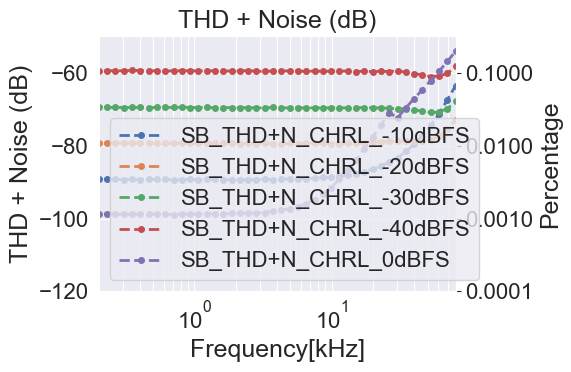

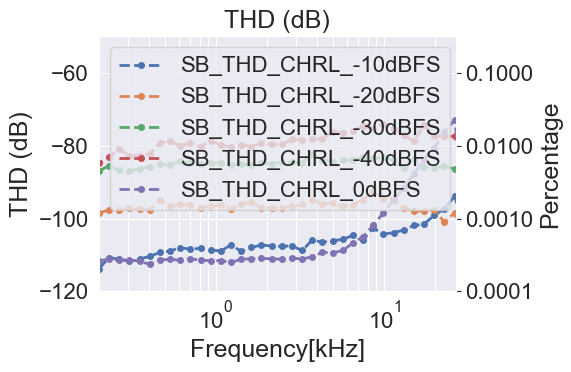

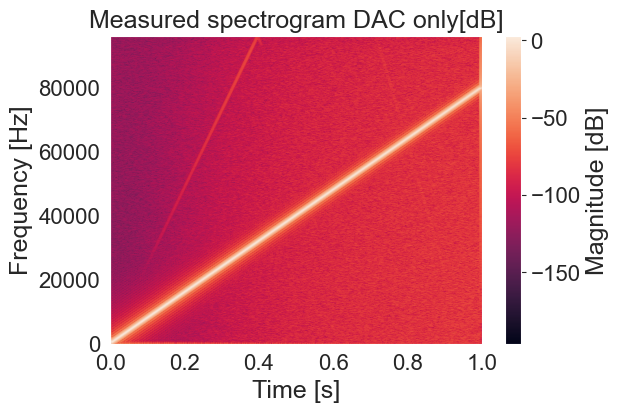

In [21]:
r2_data_path = dataTargetFolder / "Fig R2.xlsx"
availableSheets = load_workbook(r2_data_path, read_only=True, keep_links=False).sheetnames
availableSheets = [p for p in availableSheets if not any(word in p for word in "Plots")]
noNoise = [p for p in availableSheets if not any(word in p for word in "_THD_")]
plusNoise = sorted([p for p in availableSheets if ("_THD+N_" in p)])
noNoise = sorted([p for p in availableSheets if ("_THD_" in p)])

print(plusNoise)
print(noNoise)

for ii in (1, 2):

    if ii == 1:
        group = plusNoise
        labelString = "THD + Noise (dB)"
        xlim2set = (min_freq, max_freq)
        ylim2set = (-120, -50)

    elif ii == 2:
        group = noNoise
        labelString = "THD (dB)"
        xlim2set = (min_freq, max_freq / 3)
        ylim2set = (-120, -50)

    fig = plt.figure(figsize=default_fig_size, tight_layout=True)
    ax = fig.add_subplot(1, 1, 1)
    for idb, sheet in enumerate(group):
        d = load_xlsx_sheet(r2_data_path, sheet, col2=1)
        ax.plot(
            d["X"] / 1000, d["Y"], linewidth=2, linestyle="--", c=myColorPal[idb], marker="o", markersize=4, label=sheet
        )

    plt.title(labelString)
    plt.xlabel("Frequency[kHz]")
    plt.ylabel(labelString)
    plt.legend()

    ax.set_xscale("log", base=10)
    ax.set_ylim(ylim2set)
    ll = []
    for iexp in (-1, 0, 1, 2, 3, 4):
        ll.append(np.arange(0, 10, 1) * 10 ** (iexp))
    plt.xticks(np.concatenate(ll))
    ax.set_xlim(xlim2set)

    def thd_to_perc(x):
        return 10 ** (x / 20) * 100

    def perc_to_thd(x):
        x = np.array(x).astype(float)
        near_zero = np.isclose(x, 0)
        x[near_zero] = -np.inf
        x[~near_zero] = (np.log10(x[~near_zero] / 100)) * 20
        return x

    secax_y = ax.secondary_yaxis("right", functions=(thd_to_perc, perc_to_thd))
    secax_y.set_ylabel("Percentage")
    secax_y.set_yticks((0.0001, 0.001, 0.01, 0.1, 1))

    if savefigures:
        fig.savefig(genpath(r2_data_path.name + "_" + sheet, figureTargetFolder))
    fig.show()

## Chirp spectrogram (DAC ONLY)
chirpFile = dataTargetFolder / "Fig R2 chirp_SB.trc"
fs = 192000
wave_start_sample = 180000
d = load_trc_file(chirpFile, col2=1)
d = d["Y"].values[wave_start_sample:]
fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1, 1, 1)

f, t, Sxx = signal.spectrogram(
    d * 2,
    fs,
    noverlap=int(10 / 1000.0 * fs) - (int(fs * 0.001)),
    nperseg=int(10 / 1000.0 * fs),
    mode="magnitude",
    scaling="spectrum",
)
plt.pcolormesh(t, f, 20 * np.log10(Sxx), shading="gouraud", rasterized=True)
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
cb = plt.colorbar()
cb.set_label("Magnitude [dB]")
plt.title("Measured spectrogram DAC only[dB]")
ax.set_xlim((0, 1))
if savefigures:
    fig.savefig(genpath(r2_data_path.name + "_" + "linear_chirp_dac_only", figureTargetFolder))
plt.show()

## Figure R3 FFTs with amplifier (4Ohm load)

C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\3370389370.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\3370389370.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\3370389370.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\3370389370.py:85: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


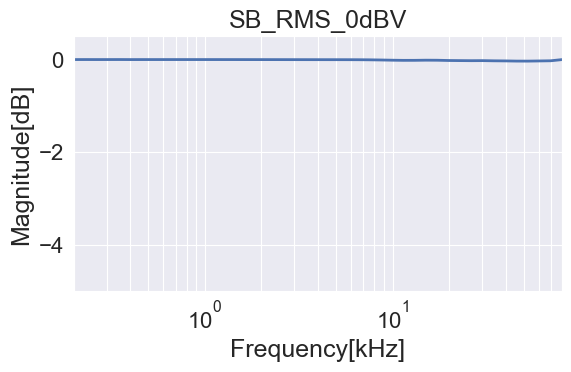

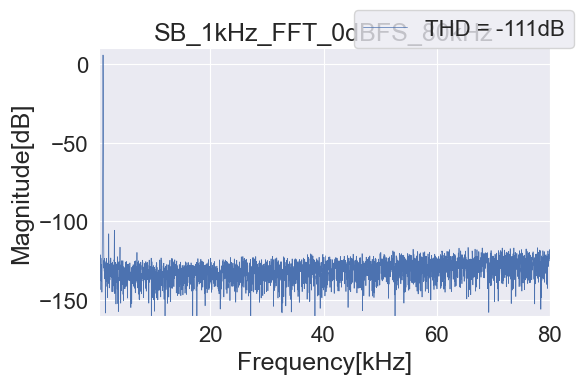

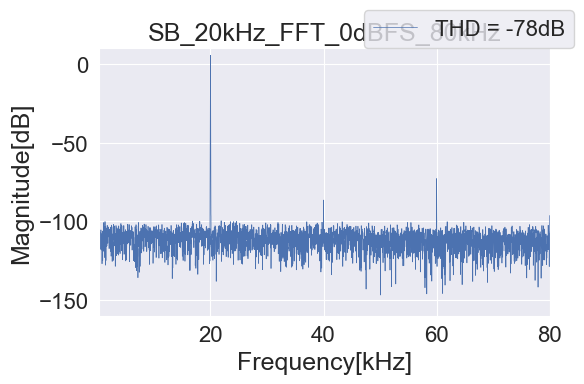

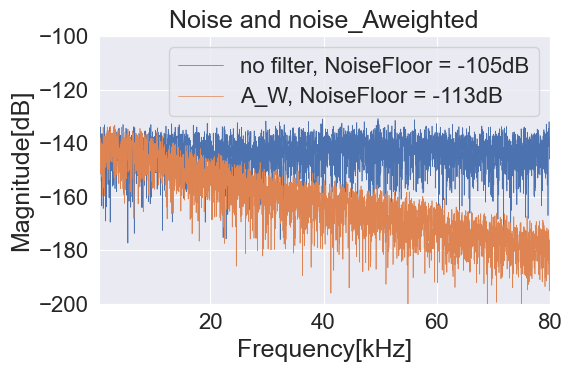

In [22]:
xlsxPath = dataTargetFolder / "Fig R3 SB_AMP_FFTs_2022_02_01_updated.xlsx"

sheetName = "SB_RMS_0dBV"
d = load_xlsx_sheet(xlsxPath, sheetName, col2=1)
d["Y"] = d["Y"] - np.max(d["Y"])
## RMS
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="Magnitude[dB]",
    xlim=None,
    linewidth=2,
)

ax.set_xscale("log", base=10)

ll = []
for iexp in (-1, 0, 1, 2, 3, 4):
    ll.append(np.arange(0, 10, 1) * 10 ** (iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim((min_freq, max_freq))
ax.set_ylim(gain_db_scale)
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + sheetName, figureTargetFolder))
fig.show()

## 1kHz sine wave
sheetName = "SB_1kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="Magnitude[dB]",
    xlim=(min_freq, max_freq),
    label="THD = -111dB",
)
fig.legend()
ax.set_ylim(fft_db_scale)
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + sheetName, figureTargetFolder))
fig.show()

## 20kHz sine wave
sheetName = "SB_20kHz_FFT_0dBFS_80kHz"
d = load_xlsx_sheet(xlsxPath, sheetName)
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="Magnitude[dB]",
    xlim=(min_freq, max_freq),
    label="THD = -78dB",
)
fig.legend()
ax.set_ylim(fft_db_scale)
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + sheetName, figureTargetFolder))
fig.show()

## Noise and Noise-Aweighted
d_noise = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_80kHz")
d_noise_a_w = load_xlsx_sheet(xlsxPath, "SB_FFT_noise_Aweight_80kHz")
fig = plt.figure(figsize=default_fig_size, tight_layout=True)
ax = fig.add_subplot(1, 1, 1)
plt.plot(d_noise["X"] / 1000, d_noise["Y"], linewidth=0.5, c=myColorPal[0], label="no filter, NoiseFloor = -105dB")

plt.plot(d_noise_a_w["X"] / 1000, d_noise_a_w["Y"], linewidth=0.5, c=myColorPal[1], label="A_W, NoiseFloor = -113dB")

plt.title("Noise and noise_Aweighted")
plt.xlabel("Frequency[kHz]")
plt.ylabel("Magnitude[dB]")
plt.xlim([min_freq, max_freq])
plt.ylim(fft_noiseAw_db_scale)
plt.legend()
if savefigures:
    fig.savefig(genpath(xlsxPath.name + "_" + "NoiseLevels", figureTargetFolder))
fig.show()

## Figure R4 sb + amp results - THDN + spectrogram




['SB_AMP_THD+N_CHR_-10dBFS_4Ohms', 'SB_AMP_THD+N_CHR_-20dBFS_4Ohms', 'SB_AMP_THD+N_CHR_-30dBFS_4Ohms', 'SB_AMP_THD+N_CHR_-40dBFS_4Ohms', 'SB_AMP_THD+N_CHR_0dBFS_4Ohms']


C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\2117742177.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


['SB_AMP_THD_CHR_-10dBFS_4Ohms', 'SB_AMP_THD_CHR_-20dBFS_4Ohms', 'SB_AMP_THD_CHR_-30dBFS_4Ohms', 'SB_AMP_THD_CHR_-40dBFS_4Ohms', 'SB_AMP_THD_CHR_0dBFS_4Ohms']


C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\2117742177.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\2117742177.py:89: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


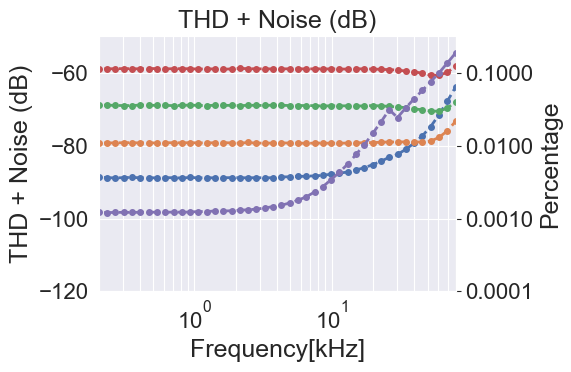

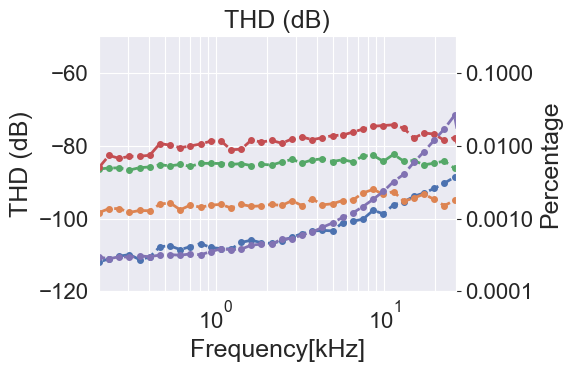

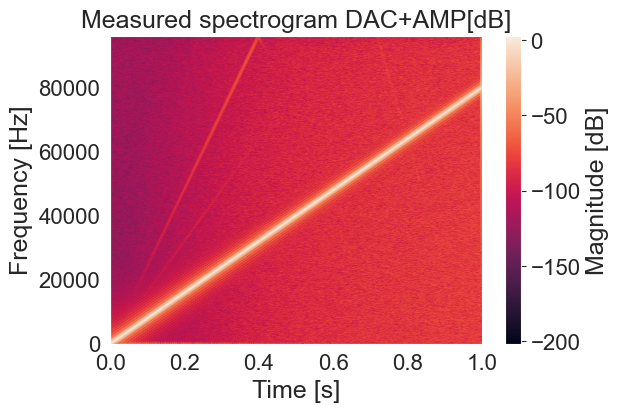

In [23]:
for ii in (1, 2):
    if ii == 1:
        r4_data_path = dataTargetFolder / "Fig R4 Data_SB_AMP_THD_2022_01_2831.xlsx"
        labelString = "THD + Noise (dB)"
        xlim2set = (min_freq, max_freq)
        ylim2set = (-120, -50)
        availableSheets = load_workbook(r4_data_path, read_only=True, keep_links=False).sheetnames
        group = sorted([p for p in availableSheets if (("_4Ohms" in p) and ("THD+N" in p))])

    elif ii == 2:
        r4_data_path = dataTargetFolder / "Fig R4 Data_SB_AMP_THD_2022_02_01.xlsx"
        labelString = "THD (dB)"
        xlim2set = (min_freq, max_freq / 3)
        ylim2set = (-120, -50)
        availableSheets = load_workbook(r4_data_path, read_only=True, keep_links=False).sheetnames
        group = sorted([p for p in availableSheets if (("_4Ohms" in p) and ("THD_" in p))])

    print(group)

    fig = plt.figure(figsize=default_fig_size, tight_layout=True)
    ax = fig.add_subplot(1, 1, 1)
    for idb, sheet in enumerate(group):

        d = load_xlsx_sheet(r4_data_path, sheet, col2=1)
        ax.plot(
            d["X"] / 1000, d["Y"], linewidth=2, linestyle="--", c=myColorPal[idb], marker="o", markersize=4, label=sheet
        )

    plt.title(labelString)
    plt.xlabel("Frequency[kHz]")
    plt.ylabel(labelString)
    # plt.legend()

    ax.set_xscale("log", base=10)
    ax.set_ylim(ylim2set)
    ll = []
    for iexp in (-1, 0, 1, 2, 3, 4):
        ll.append(np.arange(0, 10, 1) * 10 ** (iexp))
    plt.xticks(np.concatenate(ll))
    ax.set_xlim(xlim2set)

    def thd_to_perc(x):
        return 10 ** (x / 20) * 100

    def perc_to_thd(x):
        x = np.array(x).astype(float)
        near_zero = np.isclose(x, 0)
        x[near_zero] = -np.inf
        x[~near_zero] = (np.log10(x[~near_zero] / 100)) * 20
        return x

    secax_y = ax.secondary_yaxis("right", functions=(thd_to_perc, perc_to_thd))
    secax_y.set_ylabel("Percentage")
    secax_y.set_yticks((0.0001, 0.001, 0.01, 0.1, 1))

    if savefigures:
        fig.savefig(genpath(r4_data_path.name + "_" + sheet, figureTargetFolder))
    fig.show()


## Chirp spectrogram (DAC + AMP)

chirpFile = dataTargetFolder / "Fig R2 chirp_SB_AMP.trc"
fs = 192000
wave_start_sample = 184500
d = load_trc_file(chirpFile, col2=1)
d = d["Y"].values[wave_start_sample:]
fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1, 1, 1)

f, t, Sxx = signal.spectrogram(
    d * 2,
    fs,
    noverlap=int(10 / 1000.0 * fs) - (int(fs * 0.001)),
    nperseg=int(10 / 1000.0 * fs),
    mode="magnitude",
    scaling="spectrum",
)
plt.pcolormesh(t, f, 20 * np.log10(Sxx), shading="gouraud", rasterized=True)
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
cb = plt.colorbar()
cb.set_label("Magnitude [dB]")
plt.title("Measured spectrogram DAC+AMP[dB]")
ax.set_xlim((0, 1))

if savefigures:
    fig.savefig(genpath("Fig R4 Chirp_exit_amp", figureTargetFolder))
fig.show()

## Fig R5 Sweep with speaker

C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\2958969736.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\2958969736.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


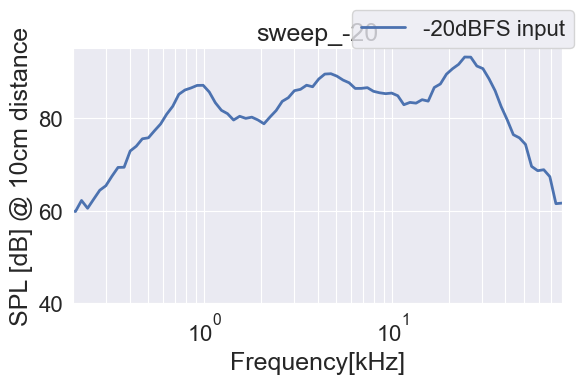

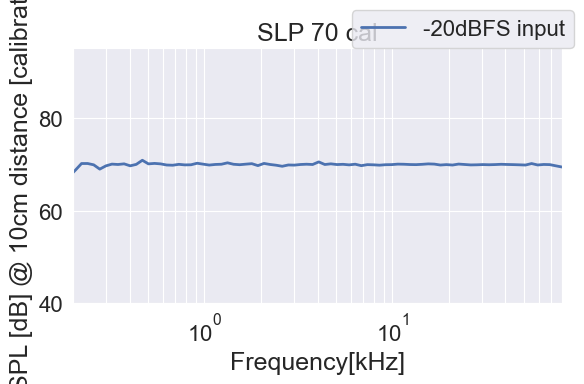

In [24]:
sweep_path = dataTargetFolder / "Fig R5 cal_2020_02_11.xlsx"
sheetName = "sweep_-20"
d = load_xlsx_sheet(sweep_path, skiprows=15, col1=0, col2=11, sheetName=sheetName)
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="SPL [dB] @ 10cm distance",
    xlim=(0, 80),
    label="-20dBFS input",
    linewidth=2,
)
fig.legend()
ax.set_ylim((40, 95))
ax.set_xscale("log", base=10)
ll = []
for iexp in (-1, 0, 1, 2, 3, 4):
    ll.append(np.arange(0, 10, 1) * 10 ** (iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim(min_freq, max_freq)
if savefigures:
    fig.savefig(genpath(sweep_path.name + "_" + sheetName, figureTargetFolder))
fig.show()


sweep_path = dataTargetFolder / "Fig R5 cal_2020_02_11.xlsx"
sheetName = "SLP 70 cal"
d = load_xlsx_sheet(sweep_path, skiprows=15, col1=0, col2=11, sheetName=sheetName)
fig, ax = plot_quick_XY(
    d,
    figsize=default_fig_size,
    c=myColorPal[0],
    title=sheetName,
    xlabel="Frequency[kHz]",
    ylabel="SPL [dB] @ 10cm distance [calibrated]",
    xlim=(0, 80),
    label="-20dBFS input",
    linewidth=2,
)
fig.legend()
ax.set_ylim((40, 95))

ax.set_xscale("log", base=10)
ll = []
for iexp in (-1, 0, 1, 2, 3, 4):
    ll.append(np.arange(0, 10, 1) * 10 ** (iexp))
plt.xticks(np.concatenate(ll))
ax.set_xlim(min_freq, max_freq)

if savefigures:
    fig.savefig(genpath(sweep_path.name + "_" + sheetName, figureTargetFolder))
fig.show()

## Fig R6 Latency

C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\3972479039.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_13392\3972479039.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


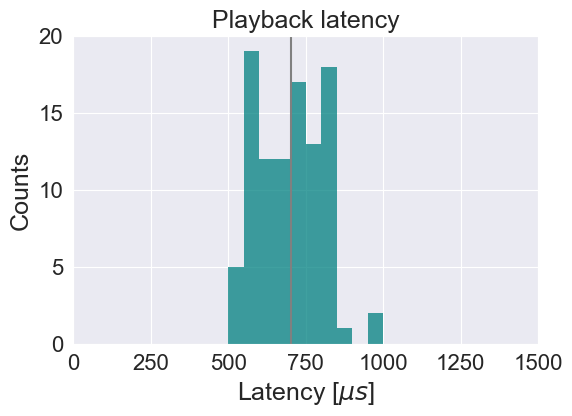

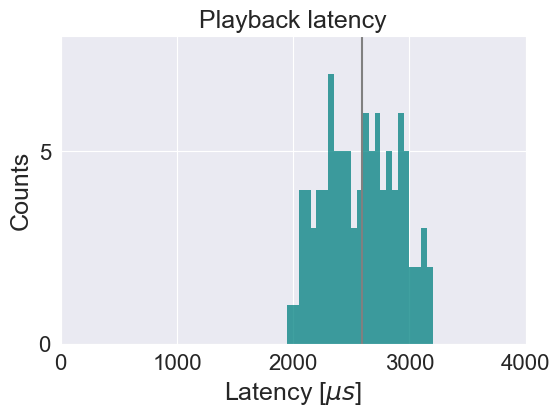

In [25]:
latencyData_path = dataTargetFolder / "Fig R6 Latency.xlsx"
lat_raw_data = load_xlsx_sheet(latencyData_path, skiprows=0, col1=0, col2=1, sheetName="Sheet1")
fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1, 1, 1)
sns.histplot(data=lat_raw_data["Y"], discrete=False, bins=np.arange(0, 1500, 50), color="teal", edgecolor="none")

plt.vlines(np.median(lat_raw_data["Y"]), 0, 20, colors="gray")
ax.set_ylabel("Counts")
ax.set_xlabel(r"Latency [$\mu s$]")
ax.set_ylim((0, 20))
ax.set_xlim((0, 1500))
ax.set_title("Playback latency")
ax.set_yticks(np.arange(0, 25, 5))

if savefigures:
    fig.savefig(genpath(latencyData_path.name + "_" + "PlaybackLatency", figureTargetFolder))
fig.show()

##

harp_lat_raw_data = pd.read_excel(
    open(latencyData_path, "rb"), sheet_name="HarpExperiment", skiprows=0, header=None, names=["X", "Y"]
)

fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1, 1, 1)
sns.histplot(data=harp_lat_raw_data["Y"], discrete=False, bins=np.arange(0, 4000, 50), color="teal", edgecolor="none")

plt.vlines(np.median(harp_lat_raw_data["Y"]), 0, 8, colors="gray")
ax.set_ylabel("Counts")
ax.set_xlabel(r"Latency [$\mu s$]")
ax.set_ylim((0, 8))
ax.set_xlim((0, 4000))
ax.set_title("Playback latency")
ax.set_yticks(np.arange(0, 8, 5))

if savefigures:
    fig.savefig(genpath(latencyData_path.name + "_" + "HarpPlaybackLatency", figureTargetFolder))
fig.show()

## Plot raw data from osciloscope

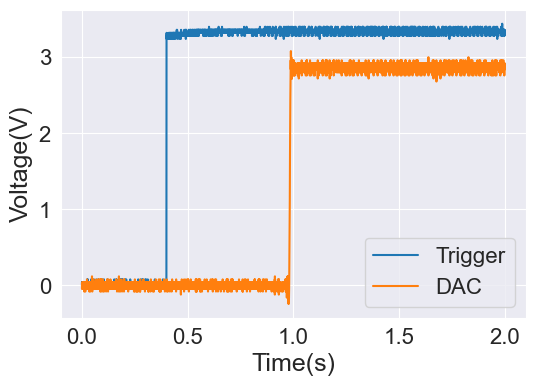

In [26]:
fs = 1.0 / 0.00000031999999806

raw_osc_path = dataTargetFolder / "Fig R6 Latency Raw Volt.csv"
raw_osciloscope_data = read_osciloscope_data(raw_osc_path)


fig = plt.figure(figsize=default_fig_size)
ax = fig.add_subplot(1, 1, 1)
ts = np.arange(0, raw_osciloscope_data.shape[0] / fs, 1 / fs)
ts = ts * 1000


plt.plot(ts, raw_osciloscope_data["Trigger"], label="Trigger")
plt.plot(ts, raw_osciloscope_data["SoundCard"], label="DAC")
plt.legend()
plt.ylabel('Voltage(V)')
plt.xlabel("Time(s)")
plt.show()

